# NNIA Assignment 4

**DEADLINE: 7. 12. 2021 08:00 CET**  
Submission more than 10 minutes past the deadline will **not** be graded!

- Name & ID 1 (Teams username e.g. s8xxxxx): 
- Name & ID 2 (Teams username e.g. s8xxxxx):
- Hours of work per person: 

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required. 
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

## 1 Calculus Revision (6 points)

### 1.1 Critical Points (2 points)

Consider the following functions: $f(x)=5x^2 +4x^3 −10$ and $g(x)=6(x−3)^3 +2$.

1. Compute the first derivatives for both functions. (0.5 pts)
2. Compute the second derivatives for both functions. (0.5 pts)
3. Find all critical points for both functions (using first and second derivatives) and give their types (refer to lecture slides). Make sure to comment on how one determines the types of critical points. (1 pt)

### 1.2 Local and Global (3 points)

Some functions have more than one or two critical points such as function $h(x)=4x^2sin(x)+\frac{e^x}{e^x+1} + x^3$.
1. Compute the first derivative for $h$. (Hint: Use the Product and Quotient rules). (1 pt)
2. Plot $h$ for the interval $x \in (-4,5)$. Use an online resource like Wolfram Alpha or Desmos. (0.5 pt)
3. Find the critical points from left to right and name them as $p_1, p_2,...p_n$ (no need for exact coordinates). For each point determine its type and if it is local or global. (0.5)
4. Why can local minima cause optimization algorithms to fail? (0.5)

### 1.3 Activation Functions (1.5 points)

Three of the most commonly-used activation functions are the sigmoid function, hyperbolic tangent, and ReLU. The equations for these functions are provided below:

* $\sigma(x) = \frac{1}{1+e^{-x}}$  

* $\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

* $\text{ReLU}(x) =  \bigg\{ \begin{array}{ll} 0, & x < 0 \\ x, & x > 0 \\ \end{array}$

Again, using code or an online resource like Wolfram Alpha or Desmos, graph each function along with its derivative. Make sure to include the plots in your solution.
1. Discuss the differences you observe. (1 sentence)
2. What are the advantages and disadvantages of each? In particular, think about how the range of the function and the amplitude of the derivative would affect a network. (2 sentences)


### 1.1 <font color="red">To Do</font>

1.  

2.  
    
3.  

### 1.2 <font color="red">To Do</font>

1.   

2.  
    
3. 

4. 

### 1.3 <font color="red">To Do</font>

**Sigmoid Function:**



**Tanh Function:**



**Relu Function:**




## 2.3 Neural Networks Hello World (4 points)

Construct a neural network for the California Housing Prices dataset.
It is composed of two linear layers with hidden dimensionality of $32$ and ReLU after the first layer: $L_{8\rightarrow 32} \circ \text{ReLU} \circ L_{32 \rightarrow 1}$ where $L_{x\rightarrow y}$ is a linear layer with $y$ hidden nodes (`nn.Linear(x, y)`).

Split your data into dev and training sets (1000 training, 100 dev, discard rest) and optimize these networks with Adam with learning rate $10^{-3}$.
Report MSE on both training and dev sets. You can use PyTorch built-in functions to solve this exercise. 

Notes:
- Please read [this introduction to the optimization loop in PyTorch](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html). It should give you a good overview to what PyTorch needs from you to train a neural network.
- Run your training multiple times with different seeds because the results have quite high variance.
- There are many optimizers available and Adam is an optimizer that's more complex than SGD (stochastic gradient descent). It has not yet been covered in the lecture but its usage in code is equivalent to that of SGD and performs much better.


In [48]:
# DONE
# from your solution module import ...
# your outputs should include Training MSE and Dev MSE.
# useful imports

%load_ext autoreload
%autoreload 2

import torch
import solution
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from sklearn.datasets import fetch_california_housing

# Data preparation

housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)


# Slicing data
## Train Set

### Standardizing the Data
my_scaler = solution.StandardScaler()
scaled_data= my_scaler.fit_transform(X=housing.data, y=housing.target)

print(type(scaled_data))

### Slice
data_train = torch.from_numpy(np.float32(scaled_data[:1000]))
target_train = torch.from_numpy(np.float32(housing.target[:1000])).reshape([1000,1]) 

### Checking for shapes
print(data_train.shape)
print(target_train.shape)

### train_set is a touple
train_set = (data_train, target_train)

## Dev Set
### Slice
data_dev = torch.from_numpy(np.float32(scaled_data[1000:1100]))
target_dev = torch.from_numpy(np.float32(housing.target[1000:1100])).reshape([100,1])


### checking for shapes
print(data_dev.shape)
print(target_dev.shape)
dev_set = (data_dev,target_dev)

# Loading the data into a Dataloader
custom_train = solution.CustomDataset(train_set)
train_dataloader = DataLoader(custom_train, batch_size=10)

custom_train = solution.CustomDataset(dev_set)
dev_dataloader = DataLoader(custom_train, batch_size=10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(20640, 8)
(20640,)
<class 'numpy.ndarray'>
torch.Size([1000, 8])
torch.Size([1000, 1])
torch.Size([100, 8])
torch.Size([100, 1])


In [49]:

model = solution.NeuralNetwork()

loss_fn = nn.MSELoss()
learning_rate = 10**-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    solution.train_loop(train_dataloader, model, loss_fn, optimizer)
    solution.test_loop(dev_dataloader, model, loss_fn)
print("Done!")



Epoch 1
-------------------------------
------- Training Loop -------
Traning Loss: 2.9923953226953746
------- Test Loop --------
Avg MSE loss : 0.764856 

Epoch 2
-------------------------------
------- Training Loop -------
Traning Loss: 1.0309602809883653
------- Test Loop --------
Avg MSE loss : 1.549365 

Epoch 3
-------------------------------
------- Training Loop -------
Traning Loss: 0.5763946664892137
------- Test Loop --------
Avg MSE loss : 1.623821 

Epoch 4
-------------------------------
------- Training Loop -------
Traning Loss: 0.38908743087202313
------- Test Loop --------
Avg MSE loss : 1.501639 

Epoch 5
-------------------------------
------- Training Loop -------
Traning Loss: 0.3348109708726406
------- Test Loop --------
Avg MSE loss : 1.416264 

Epoch 6
-------------------------------
------- Training Loop -------
Traning Loss: 0.3188047969713807
------- Test Loop --------
Avg MSE loss : 1.369380 

Epoch 7
-------------------------------
------- Training Loop -

# Bonus Learning Rate Effect on Performance (1 point)

Run your neural network with different learning rates (scale logarithmically from $10^{-10}$ to $10^{0}$) and observe the effects on performance. Importantly keep the number of optimization steps (epochs) constant. Because the process is very random run the model multiple times (e.g. 3 times) and plot the results. Try to form hypothesis about the results which you got.

Don't worry, the model training can be done on a CPU and is not computationally intensive.

In [50]:
learning_rates = [10**-i for i in range(0,10)]

In [51]:
train_loss_list = []
test_loss_list = []

for learning_rate in learning_rates:
    

    model = solution.NeuralNetwork()

    loss_fn = nn.MSELoss()
    learning_rate = learning_rate

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    epochs = 3
    epoch_train_loss = []
    epoch_test_loss =[] 
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")


        train_loss = solution.train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loss = solution.test_loop(dev_dataloader, model, loss_fn)
        epoch_train_loss.append(train_loss)
        epoch_test_loss.append(test_loss)
    train_loss_list.append(sum(epoch_train_loss)/3)
    test_loss_list.append(sum(epoch_test_loss)/3)



    

    



Epoch 1
-------------------------------
------- Training Loop -------
Traning Loss: 7526.500945008993
------- Test Loop --------
Avg MSE loss : 20935.069272 

Epoch 2
-------------------------------
------- Training Loop -------
Traning Loss: 116.87149160370231
------- Test Loop --------
Avg MSE loss : 2409.508352 

Epoch 3
-------------------------------
------- Training Loop -------
Traning Loss: 1.5743328318186105
------- Test Loop --------
Avg MSE loss : 141.458061 

Epoch 1
-------------------------------
------- Training Loop -------
Traning Loss: 1.2356557233445347
------- Test Loop --------
Avg MSE loss : 1.640783 

Epoch 2
-------------------------------
------- Training Loop -------
Traning Loss: 0.7144412529468537
------- Test Loop --------
Avg MSE loss : 2.014853 

Epoch 3
-------------------------------
------- Training Loop -------
Traning Loss: 0.7478463144600391
------- Test Loop --------
Avg MSE loss : 1.660147 

Epoch 1
-------------------------------
------- Training

Text(0.5, 1.0, 'Training - Learning Rate x MSE')

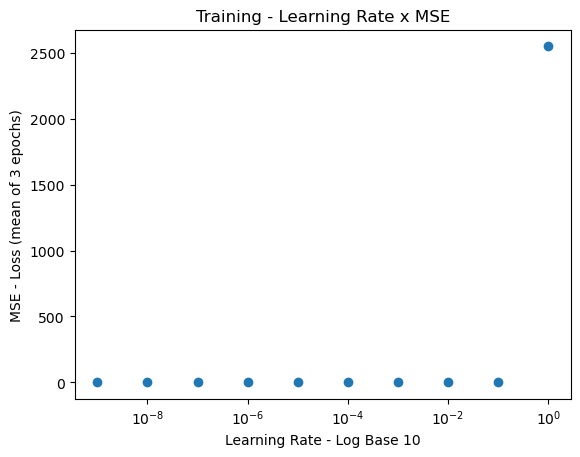

In [52]:
import matplotlib
import matplotlib.pyplot as plt

# Plot MSE x Learning Rate
plt.scatter(learning_rates, train_loss_list)
plt.xscale("log")
plt.xlabel("Learning Rate - Log Base 10")
plt.ylabel("MSE - Loss (mean of 3 epochs)")
plt.title('Training - Learning Rate x MSE')

Text(0.5, 1.0, 'Training - Learning Rate x MSE - without 1')

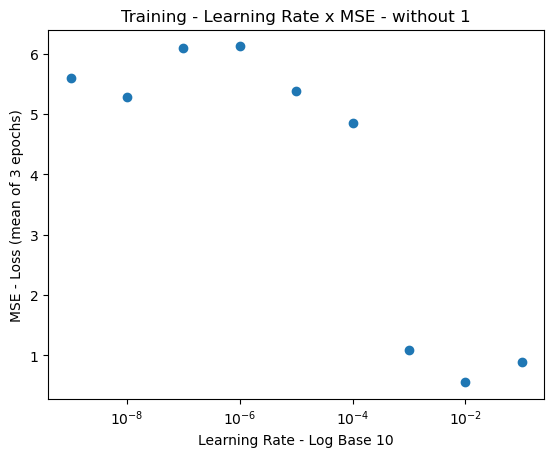

In [53]:
# Plot MSE x Learning Rate - Removing 10⁰ since it overshoots terribly
plt.scatter(learning_rates[1:], train_loss_list[1:])
plt.xscale("log")
plt.xlabel("Learning Rate - Log Base 10")
plt.ylabel("MSE - Loss (mean of 3 epochs)")
plt.title('Training - Learning Rate x MSE - without 1')

Text(0.5, 1.0, 'Test - Learning Rate x MSE - without 1')

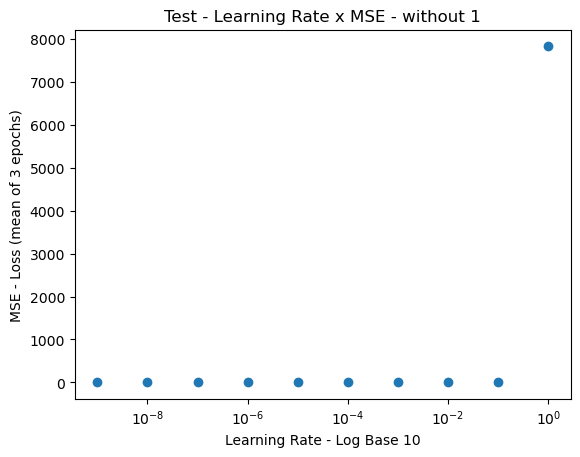

In [56]:
plt.scatter(learning_rates, test_loss_list)
plt.xscale("log")
plt.xlabel("Learning Rate - Log Base 10")
plt.ylabel("MSE - Loss (mean of 3 epochs)")
plt.title('Test - Learning Rate x MSE - without 1')

Text(0.5, 1.0, 'Test - Learning Rate x MSE - without 1')

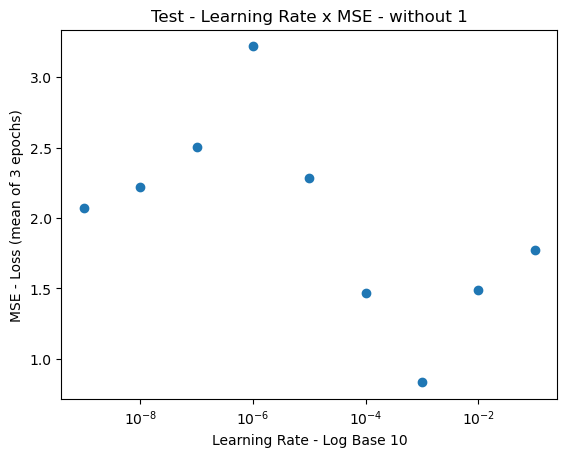

In [55]:
# Plot MSE x Learning Rate
plt.scatter(learning_rates[1:], test_loss_list[1:])
plt.xscale("log")
plt.xlabel("Learning Rate - Log Base 10")
plt.ylabel("MSE - Loss (mean of 3 epochs)")
plt.title('Test - Learning Rate x MSE - without 1')

For learning rate 1 the MSE has completely overshoot, we probably have an exploding gradient.

For this exercise, since it was not specified which MSE we should plot, it was
decided to plot a mean of the MSE for each training epoch. 

For the training Data the MSE visibly drops when using LR 10^-3, has its lowest
value on 10^ and increases a bit for higher MSE values. 
This probably means we found a minima in the modeled function.

For the Development (test) Data, the lowest MSE value is found using LR 10^-3.
This might be the minima for the modeled function.

For variability issues, check this first before running, the conclusion might vary.